In [14]:
# Importo file e librerie
import pandas as pd 
import seaborn as sns 

fpath = r"C:\Users\radus\OneDrive\2 Epicode\Epicode - Lezioni\M3 - Phyton\Prova Finale\owid-covid-data.csv"
cvd = pd.read_csv(fpath)

## Esplorazione del file:
# Dimensioni del Dataset
dimensioni = cvd.shape # 67 colonne e 429435
#Verifica presenza dati nulli
cvd =   cvd.replace("", None)
nulli = cvd.isnull().sum()
info = cvd.info()

# Metadati
colonne = cvd.columns # colonne
indici= cvd.index
# Anteprima
anteprima = cvd.head(5)
descrizione = cvd.describe()
# lavorando dopo con i dati, trasofrmo la colonna date in formato datetime
cvd["date"] = pd.to_datetime(cvd.date)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [16]:
descrizione

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060828,112096.199420,122.357073,122.713852,835.514337,...,33.097758,50.649390,3.106895,73.702098,0.722178,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666404
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636565,162240.412405,1508.778585,559.701663,1134.932641,...,13.853952,31.905236,2.549168,7.387914,0.149237,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892770
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.190000,0.100000,53.280000,0.390000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.450000
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100000,0.000000,0.000000,24.570000,...,22.600000,20.860000,1.300000,69.500000,0.600000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.875000
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.480000,0.000000,2.790000,295.090000,...,33.100000,49.540000,2.500000,75.050000,0.740000,6.336393e+06,6.815200e+03,8.130000,5.660000,1270.800000
75%,7.582720e+05,0.000000e+00,3.132900e+02,9.574000e+03,0.000000,3.140000,156770.190000,0.000000,56.250000,1283.820000,...,41.500000,82.500000,4.210000,79.460000,0.830000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.025000
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.960000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.520000


In [22]:
#1. Si chiede di trovare, per ogni continente: 
#a. il numero di casi fin dall'inizio della pandemia 

# Metodo 1 
cont = cvd.groupby("continent")["new_cases"].sum()
totali_giornalieri = cont.sum()

# Metodo 2
totali_tot = cvd[(cvd.iso_code == "OWID_WRL")&(pd.to_datetime(cvd.date) == pd.to_datetime("2024-08-4"))]["total_cases"].iloc[0]

#  C'è una leggera differenza 
differenza = totali_giornalieri - totali_tot
differenza_percentile = ((totali_giornalieri - totali_tot)/totali_giornalieri)*100
# Perché questa differenza ? Studiando il dataset: 
ultimi_total_cases = cvd[(cvd.iso_code == "OWID_WRL")&(pd.to_datetime(cvd.date) >= pd.to_datetime("2024-08-4"))]
#L'ultimo aggiornamento risale al 04/08/24. E' possibile che new_cases abbia tenuto conto di casi cumulativi fino alla data finale (14/08), oppure che abbia tenuto conto dei casi potenziali e non quelli effettivi
# Non lo sappiamo di preciso, tuttavvia possiamo fare le seguenti considerazioni: 
# I dati aggregati potrebbero essere "smussati" e quindi più precisi. I dati presi singolarmente e poi sommati potrebbero ridare una stima
# più sommaria dei casi. Per completezza restituisco entrambi, conscio del fatto che entrambe le soluzioni rispondono alla domanda
# Infine, possiamo dire che essendo la differenza percentile estremamente bassa (0.008798932253939906), possiamo considerare entrambi validi)

#b. la percentuale rispetto al totale mondiale del numero di casi
percentuali1 = round((cont/totali_giornalieri)*100,3)
percentuali2 = round((cont/totali_tot)*100,3)

# la differenza in % è, e solo in calcuni casi, di 0,001%. Possiamo ritenere attendibili entrambe le misure.

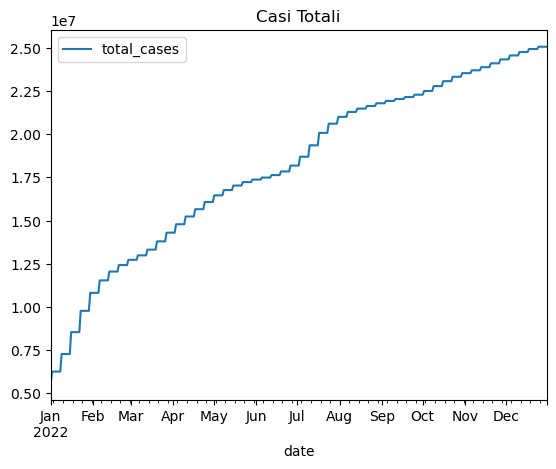

In [38]:
# Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:
#a. l'evoluzione del casi totali dall'inizio alla fine dell'anno 
ita22 = cvd[(cvd.iso_code == "ITA")&(cvd.date.dt.year == 2022)][["total_cases","date"]]
casi_totali22 = ita22.plot(x = "date", y = "total_cases", title = "Casi Totali")
#Come potevamo immaginare, da gennaio a dicembre del 2022 i casi sono aumentati. 
#In particolare, possiamo vedere che sono quasi quintuplicati, da 5 milioni quasi 25 nel giro di un anno)

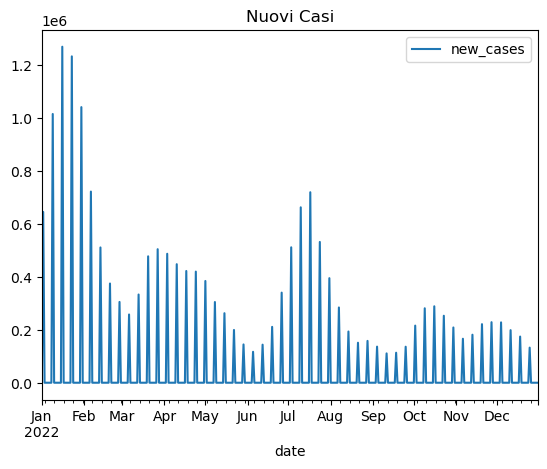

In [42]:
#b. il numero di nuovi casi rispetto alla data -- 
#questo dato è interesssante, tuttavia possiamo anche raggruppare per mese, avendo comunque una stima precisa e ordinata
# questo perchè ancora non abbiamo eliminato i valori nulli, quindi stiamo tenendo conto dei giorni nei quali il dato è nullo
ita22new = cvd[(cvd.iso_code == "ITA")&(cvd.date.dt.year == 2022)][["new_cases","date"]]
casi_nuovi22 = ita22new.plot(x = "date", y = "new_cases", title = "Nuovi Casi")

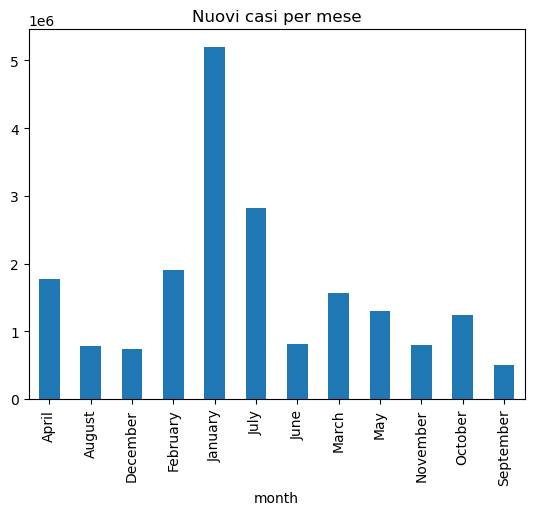

In [44]:
#b. raggruppato per mese
ita22new = cvd[(cvd.iso_code == "ITA")&(cvd.date.dt.year == 2022)][["new_cases","date"]]
ita22new['month'] = ita22new['date'].dt.month_name()
itamonth = ita22new.groupby('month')['new_cases'].sum()
casi_nuovi22 = itamonth.plot(kind='bar', title='Nuovi casi per mese')

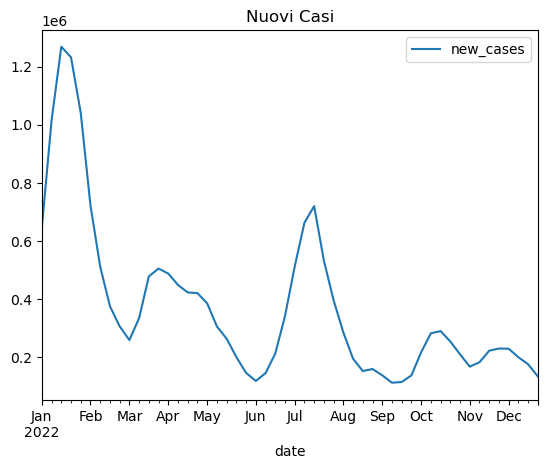

In [9]:
# poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni
filtro = cvd.new_cases != 0
itanew_clean = cvd[(cvd.iso_code == "ITA")&(cvd.date.dt.year == 2022)&(filtro)][["new_cases","date"]]
casi_nuovi22 = itanew_clean.plot(x = "date", y = "new_cases", title = "Nuovi Casi")

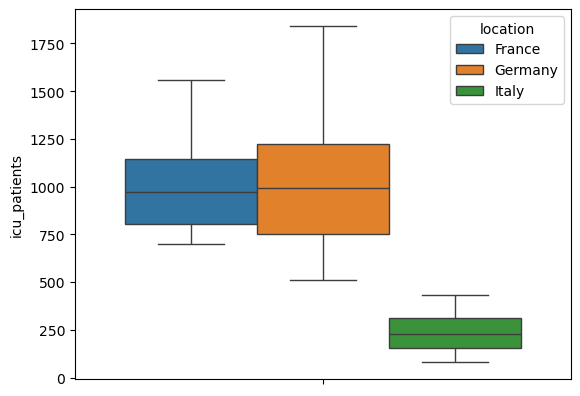

In [48]:
# Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di 
# pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)
nazioni = (cvd.iso_code == "DEU") | (cvd.iso_code == "FRA") | (cvd.iso_code == "ITA") 
date = (cvd.date >= pd.to_datetime("2022-05-01")) &  (cvd.date <= pd.to_datetime("2023-04-30"))
icu_nazioni = cvd[nazioni&date][["location", "date", "icu_patients"]]
analisi_differenze = sns.boxplot(data = icu_nazioni,y = "icu_patients", hue = "location")
# Poossiamo subito notare che l'Italia è in testa. Ha probabilmente gestito l'emergenza sanitaria meglio di quanto non abbiano fatto le altre due nazioni, che hanno 
# una mediana molto più alta. Anche la differenza interquartile è nettamente più alta. e massimo e minimo sono  sotto controllo. 
# Germania e francia hanno più o meno la stessa varianza (qualche in punto in più per i tedeschi) e una fluttuazione più alta in germania, che suggerisce che 
# probabilmente la situazione è stata gestita in maniera differente in base alla zone considerate.
# In grancia la situaizone è leggermente migliore, con un picco meno alto rispetto alla germania, ma un minimo più alto, il che protebbe suggerire che la situaizone 
# E' rimasta più uniforme rispetto alla germania (differenza comunque non così netta come possiamo vedere con l'Italia)
# Se dovessimo fare una classifica per chi ha gestito meglio l'emergena sanitaria: 
# 1. Italia 
# 2. Francia 
# 3. Germania

<Axes: xlabel='location', ylabel='hosp_patients'>

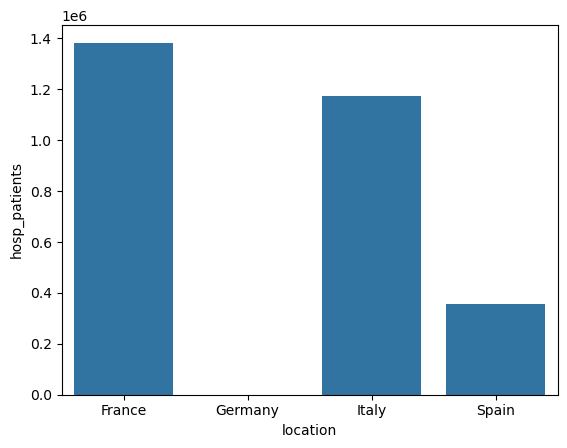

In [50]:
# Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
nazioni1 = (cvd.iso_code == "DEU") | (cvd.iso_code == "FRA") | (cvd.iso_code == "ITA") | (cvd.iso_code == "ESP") 
data = cvd.date.dt.year == 2023

#a. mostrare la somma dei pazienti ospitalizzati per ognuna 
intens = cvd[nazioni1&data][["location", "date", "hosp_patients"]]
terapia_loc = intens.groupby("location")["hosp_patients"].sum()
sns.barplot(data = terapia_loc) 
# Notiamo che la francia ha avuto il maggior numero di ospedalizzazioni. La Spagna il minore. 
# Per la Germania mancano i dati relativi alle ospedalizzazioni 

<Axes: xlabel='location', ylabel='hosp_patients'>

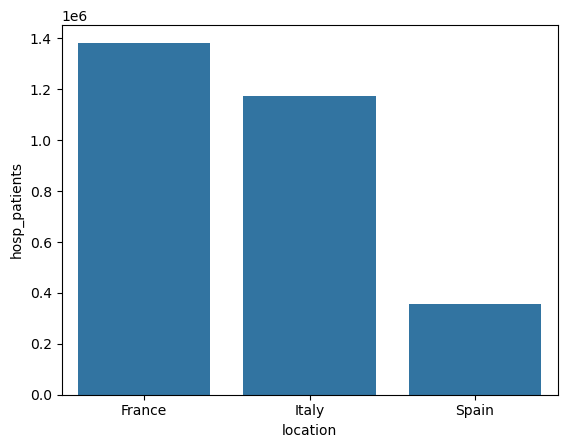

In [12]:
#b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno
intens[intens["hosp_patients"].isnull()]["location"].value_counts()
# notiamo che tutti i valori di germany sono vuoti. anche francia e spagna presentano valori nulli nell'analisi, ma potrebbe essere dovuto al fatto 
# che ogni tot venivano inseriti dati aggregati. 
# Rimozione dati nulli
intensnull = intens.dropna(subset=["hosp_patients"])
sns.barplot(data = intensnull.groupby("location")["hosp_patients"].sum()) 
#Essendo questo uno studio quantitativo, ha senso eliminare i dati nulli della colonna d'interesse. In linea generale, bisogna stare molto più attenti se si ha a che fare 
# con un dataset più grande, perché rimuovere righe dove sono presenti valori nulli potrebbe compromettere altri dati. 
#In questo caso, escludendo i nulli, otteniamo una rappresentaizone più chiara del contesto